# **Slide-seq lung DestVI v2 DE downstream analysis**

This notebook reproduces the Fig 3H panel.

In [1]:
import os
import numpy as np
import pandas as pd
from plotnine import *
from statsmodels.stats.multitest import multipletests

BASE_PATH = "/home/projects/nyosef/oier/Harreman_files/Slide_seq_lung"
ADATA_PATH = os.path.join(BASE_PATH, 'h5ads')
DATA_PATH = os.path.join(BASE_PATH, 'data')
PLOTS_PATH = os.path.join(BASE_PATH, 'plots')

In [2]:
file = pd.read_excel(os.path.join(DATA_PATH, "Sodium_calcium_exchange_Slide_seq_lung_ct_Harreman_no_deconv_DestVI_DE_results.xlsx"), sheet_name=None, index_col=0)

In [3]:
df = file['TAM']

In [4]:
up_macrophage_genes = [
    "CXCL9", "CXCL10", "CXCL11", "IDO1", "GBP1", "GBP4", "GBP5",
    "STAT1", "IRF8", "CD274", "SOCS1", "SOCS3", "IL10RA", "IL4R",
    "SLC11A1", "SLC11A2", "MERTK", "AXL", "SOD2", "ENTPD1", "FN1",
    "MMP14", "IFIT2", "IFIT3", "IFI44L", "CD40", "TAP1", "TLR2",
    "BCL6", "ATF3", "BIRC3", "ZFP36", "ICAM1", "NFKBIA", "IRAK1",
    "NFKBIZ", "MARCKSL1", "TNFAIP2", "TNFRSF10B", "TNFRSF4", "CSF2RB",
    "RIPK2", "HCK", "LYN", "SIGLEC1", "SIGLEC10", "SLAMF7", "RHOQ"
]

down_macrophage_genes = [
    "FOLR2", "MARCO", "CD209", "TREM2", "TYROBP", "C1QA", "C1QB", "C1QC",
    "VSIG4", "CHI3L1", "GPNMB", "FABP3", "FABP5", "APOE", "FTH1", "FTL",
    "SLC40A1", "RNASE1", "CD14", "CD163L1", "FCGR3A", "FCER1G", "LY96",
    "HMOX1", "CTSD", "CTSB", "CTSS", "CTSZ", "LIPA", "CD5L", "LGMN",
    "PLTP", "SPP1", "BLVRB", "ALOX5AP", "ADAMDEC1", "CES1", "APOC1"
]

In [11]:
int_genes_1 = df[(df.adj_pval < 0.05) & (df.log2FC > 0)].sort_values('log2FC', ascending=False).index[:50].tolist()
int_genes_2 = df[(df.adj_pval < 0.05) & (df.log2FC < 0)].sort_values('log2FC', ascending=True).index[:50].tolist()
int_genes = list((set(int_genes_1) & set(up_macrophage_genes)) | (set(int_genes_2) & set(down_macrophage_genes))) + ["SLC8A1"]

In [12]:
corr_p_vals = multipletests(df["pval"], method="fdr_bh")
min_score = np.min(df["score"][corr_p_vals[0]])

In [13]:
genes = df.index.values
score = df['score'].values
log_FC = df['log2FC'].values

fdr_transf = []
colors = []
de = []
delabel = [np.nan for i in log_FC]
for i in range(len(score)):
    if score[i] < min_score:
        colors.append('gray')
        de.append('NO')
    else:
        if log_FC[i] < 0:
            colors.append('r')
            de.append('DOWN')
        elif log_FC[i] > 0:
            colors.append('b')
            de.append('UP')
        else:
            colors.append('gray')
            de.append('NO')

for i in range(0, len(log_FC)):
    if genes[i] in int_genes:
        if score[i] > min_score:
            delabel[i] = genes[i]
            
vis_df = pd.DataFrame({'x': log_FC,
                        'y': score,
                        'de': de,
                        'delabel': delabel})


In [14]:
vis_df['de'][vis_df.delabel.isna()] = 'NO'

/tmp/ipykernel_1098131/691283540.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1098131/691283540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [15]:
df_unlabeled = vis_df[vis_df['de'] == 'NO']
df_labeled = vis_df[vis_df['de'] != 'NO']

In [25]:
print('\n'.join(df_labeled[df_labeled['de'] == 'DOWN']['delabel'].tolist()))

FTL
RNASE1
PLTP
MARCO
APOC1
FCER1G
SLC40A1
C1QC
CTSD
LIPA
TYROBP
ADAMDEC1
SPP1
HMOX1
LY96
FOLR2
GPNMB
CD209
C1QA
FABP3
C1QB


/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6 x 7 in image.
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: /home/projects/nyosef/oier/Harreman_files/Slide_seq_lung/plots/Sodium_calcium_exchange_TAMs_DE_analysis_volcano_plot.pdf
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.
/home/projects/nyosef/oier/mambaforge/envs/harreman-env/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 5 rows containing missing values.


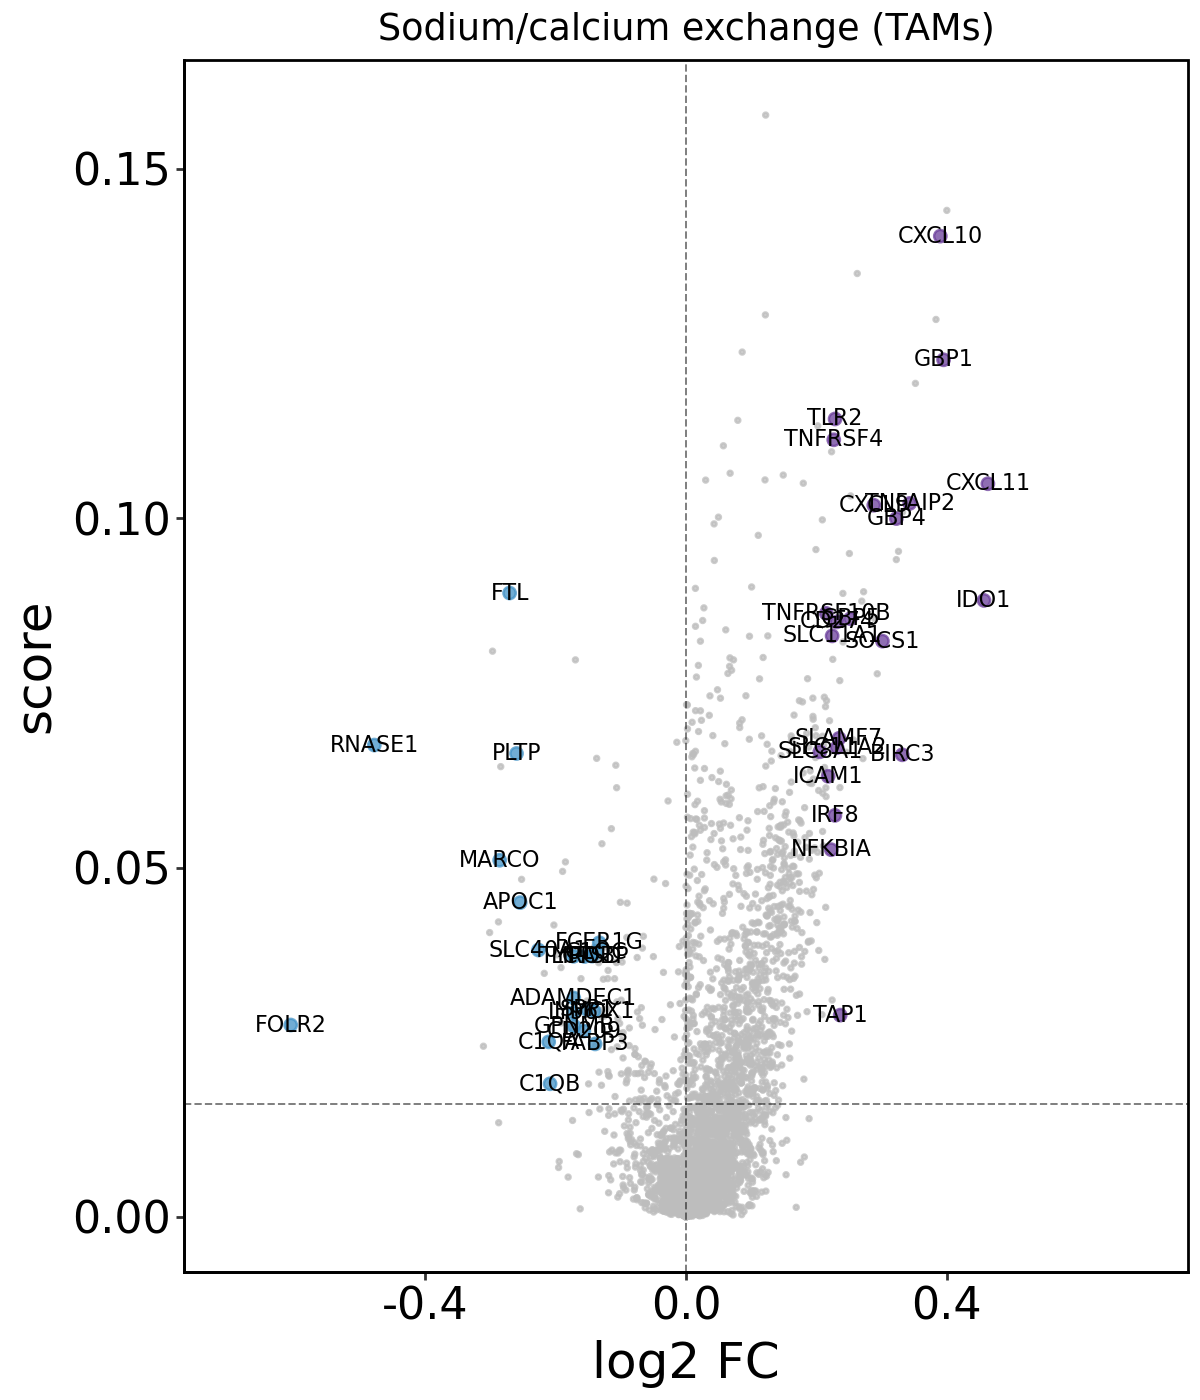

In [17]:
fig = (
    ggplot() +
    # Unlabeled points (plotted first, in background)
    geom_point(df_unlabeled, aes(x='x', y='y', color='de'), size=0.5, alpha=0.75) +
    # Labeled points (on top)
    geom_point(df_labeled, aes(x='x', y='y', color='de'), size=2, alpha=0.75) +
    # Labels
    geom_text(df_labeled, aes(x='x', y='y', label='delabel'), color='black', size=8) +
    # Aesthetics
    theme_classic() +
    geom_hline(yintercept=min_score, linetype='--', color='black', alpha=0.5, size=0.4) +
    geom_vline(xintercept=0, linetype='--', color='black', alpha=0.5, size=0.4) +
    scale_color_manual(values={'UP': '#6A3D9A', 'DOWN': '#4292C6', 'NO': '#BDBDBD'}) +
    ggtitle('Sodium/calcium exchange (TAMs)') +
    xlim(-0.7, 0.7) +
    xlab("log2 FC") + ylab("score") +
    theme(
        plot_title=element_text(hjust=0.5),
        panel_grid_major=element_blank(),
        panel_grid_minor=element_blank(),
        panel_border=element_rect(colour="black"),
        legend_position='none',
        axis_text_x=element_text(size=16, color='black'),
        axis_text_y=element_text(size=16, color='black'),
        axis_title_x=element_text(size=18),
        axis_title_y=element_text(size=18),
        figure_size=(6, 7)
    )
)
fig.save(os.path.join(PLOTS_PATH, 'Sodium_calcium_exchange_TAMs_DE_analysis_volcano_plot.pdf'))
fig